In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models, optimizers


In [4]:
data_train_path = 'Sports_Data/train'
data_test_path = 'Sports_Data/test'
data_valid_path = 'Sports_Data/valid'

In [5]:
img_width = 180
img_height = 180

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False)

Found 13492 files belonging to 100 classes.


In [7]:
data_categories = data_train.class_names

In [8]:
data_valid = tf.keras.utils.image_dataset_from_directory(
    data_valid_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
)

Found 500 files belonging to 100 classes.


In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
)

Found 500 files belonging to 100 classes.


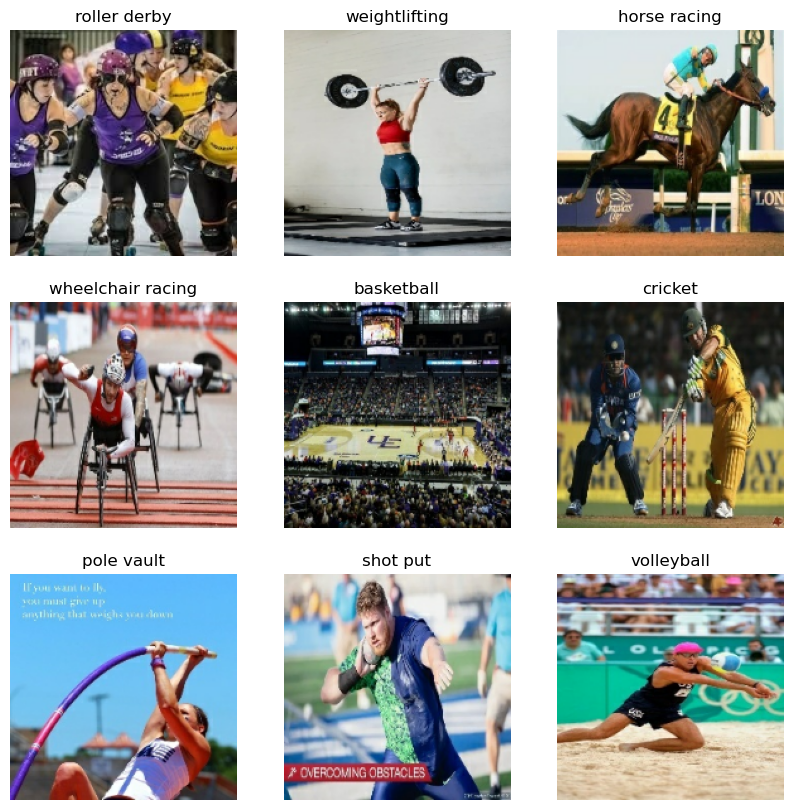

In [10]:
plt.figure(figsize=(10,10))
for images, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(data_categories[labels[i]])
        plt.axis('off')

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = models.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')
])

In [13]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [14]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_valid, epochs=epochs_size)

Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 331s 773ms/step - accuracy: 0.0433 - loss: 5.8589 - val_accuracy: 0.0880 - val_loss: 4.7126
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 414s 973ms/step - accuracy: 0.1496 - loss: 4.3961 - val_accuracy: 0.2720 - val_loss: 3.7603
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 450s 1s/step - accuracy: 0.2499 - loss: 3.7606 - val_accuracy: 0.3640 - val_loss: 3.3982
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 457s 1s/step - accuracy: 0.3492 - loss: 3.2461 - val_accuracy: 0.4120 - val_loss: 3.1702
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 434s 1s/step - accuracy: 0.4456 - loss: 2.7402 - val_accuracy: 0.4120 - val_loss: 3.0298
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 440s 1s/step - accuracy: 0.5333 - loss: 2.3733 - val_accuracy: 0.4600 - val_loss: 2.8954
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 459s 1s/step - accuracy: 0.6060 - loss: 2.0352 - val_accuracy: 0.4600 - val_loss: 2.8511
Epoch 8/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 414s 981ms/step - accuracy: 0.6722 - loss: 1.7968 -

Text(0.5, 1.0, 'Loss')

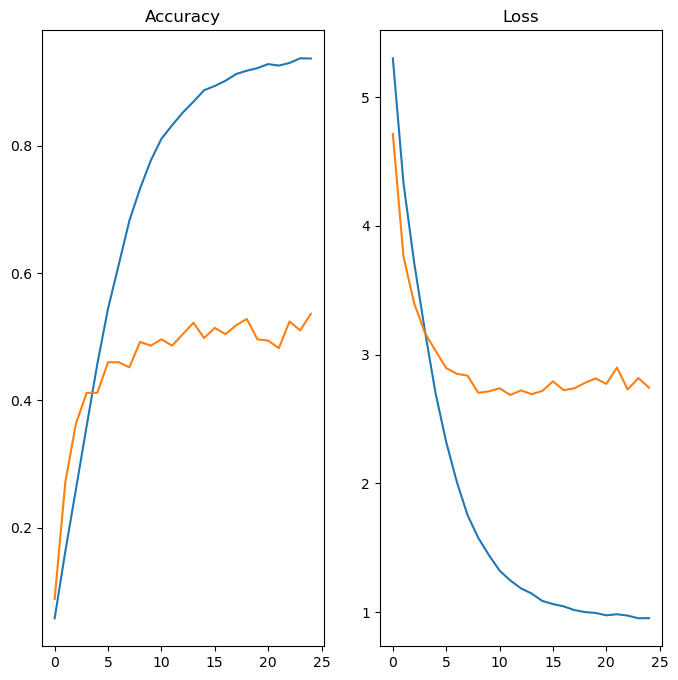

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')

In [20]:
image = 'armWrestling.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat= tf.expand_dims(img_arr,0)

In [21]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [22]:
score = tf.nn.softmax(predict)

In [23]:
print('Sports in images is {} with accuracy of {:0.2f}'.format(data_categories[np.argmax(score)], np.max(score)*100))

Sports in images is arm wrestling with accuracy of 1.38
